# __Predicting Building Energy Efficiency Using Regression Models__

## Introduction
This project aims to develop machine learning models that predict building energy efficiency by estimating heating and cooling loads based on various building characteristics. The study explores how factors like relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution influence energy demands.<br>  

We will implement both linear and non-linear regression models to assess their performance in predicting heating and cooling loads. By comparing these models, we aim to determine which approach offers better predictive accuracy for this particular problem. Linear regression models are commonly used for their simplicity and efficiency in handling linear relationships between variables. However, given the non-linear relationships observed in the dataset, non-linear regression models may provide a more robust solution. Through this comparison, I will identify the model that best captures the underlying patterns in the data and delivers the most accurate predictions for building energy efficiency.<br>  

In this project, I utilized the Energy Efficiency dataset from Kaggle (available at [dataset](https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset/data)) to develop machine learning models aimed at predicting the heating and cooling loads of residential buildings. The dataset consists of 768 samples, 8 features, and two target variables (heating load and cooling load).


In [1]:
# Importing all libraries
import pandas as pd, numpy as np, seaborn as sb, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Exploratory Data Analysis (EDA)
EDA is a crucial step in the data science process that involves examining and visualizing the dataset to uncover patterns, trends, and anomalies. It provides a deeper understanding of the data's structure, distribution, and relationships between variables. Through techniques like summary statistics, distribution plots, and correlation analysis, EDA helps in identifying important features, spotting outliers, and informing the subsequent steps in the modeling process.

#### Reading Dataset
First, we will load the dataset using pandas library.

In [2]:
df = pd.read_excel('C:/Users/Mariwan/OneDrive/Desktop/ENB2012.xlsx')
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,North,0.0,No glazing,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,East,0.0,No glazing,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,South,0.0,No glazing,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,West,0.0,No glazing,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,North,0.0,No glazing,20.84,28.28


In [3]:
print('=='*15)
print(f'Number of samples:\t{df.shape[0]}\nNumber of features:\t{df.shape[1]-2}\nNumber of targets:\t{df.shape[1]-8}')
print(f'Number of null values:  {df.isnull().sum().sum()}')
print('=='*15,'\n')
df.info()

Number of samples:	768
Number of features:	8
Number of targets:	2
Number of null values:  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    object 
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    object 
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), object(2)
memory usage: 60.1+ KB


The dataset consists of 768 samples with 8 features and 2 target variables. There are no missing values in the dataset.

#### Summary Statistics
We will perform summary statistics on the dataset to gain an overview of the key features and their distributions. This step helps in understanding the central tendencies, variability, and potential outliers in the data, which are crucial for guiding further analysis and model building.  

The summary statistics include the count, mean, standard deviation, minimum, maximum, and various percentiles (25%, 50%, and 75%) for each feature, providing a comprehensive snapshot of the dataset.

In [4]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000


`Glazing Area:` The mean is 0.234, and the maximum value is 0.4, indicating that the Glazing Area is on a relatively small scale. Additionally, since the minimum is 0, some buildings might have no glazing area, which could impact energy loads. The low range could limit its influence in the model, especially in linear models.  
`Overall Height:` The minimum and 25th percentile values are both 3.5, suggesting that a significant portion of the buildings might have the same overall height. This could reduce variability in the model.  
`Heating and Cooling Load:` The heating and cooling loads have a wide range, with standard deviations of 10.09 and 9.51, respectively. This indicates a significant variation in energy loads across the samples

#### Correlation
Let's examine the correlation between the features and the target variables (Heating Load and Cooling Load). Correlation analysis helps identify the strength and direction of the linear relationship between variables.

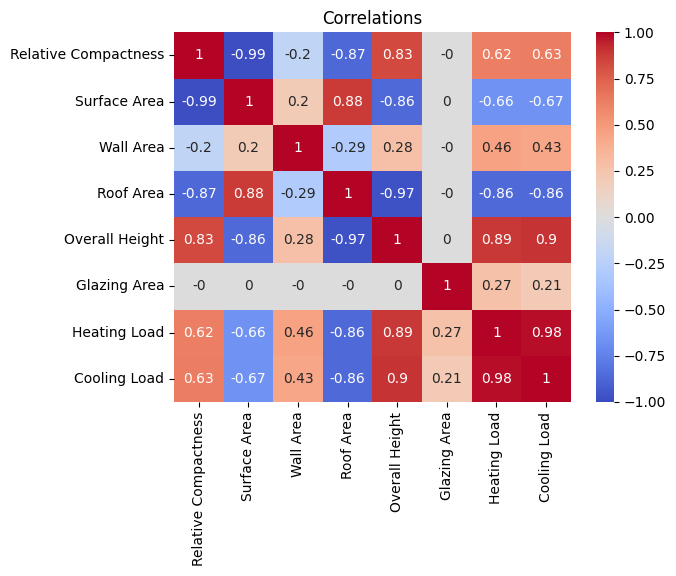

In [5]:
corr = df.select_dtypes(include='number').corr().round(2)
sb.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlations')
plt.show()

Overall, most of features show strong correlations with the target variables (Heating Load and Cooling Load). This indicates that these features are likely important predictors of energy loads. The Glazing Area feature exhibits weak correlations with both Heating Load (0.27) and Cooling Load (0.21). This suggests that its impact on energy loads is relatively minor compared to other features. There are strong correlations between features that may indicate `multicollinearity`, which could affect model performance. Multicollinearity typically has less impact on non-linear models compared to linear models because they don't rely on the same linear relationships between features. We could remove the most correlated feature but we will not make any changes in this study because we focus more on non-linear models.

#### Visualization
To gain a deeper understanding of the dataset and uncover potential patterns, we will visualize the dataset.

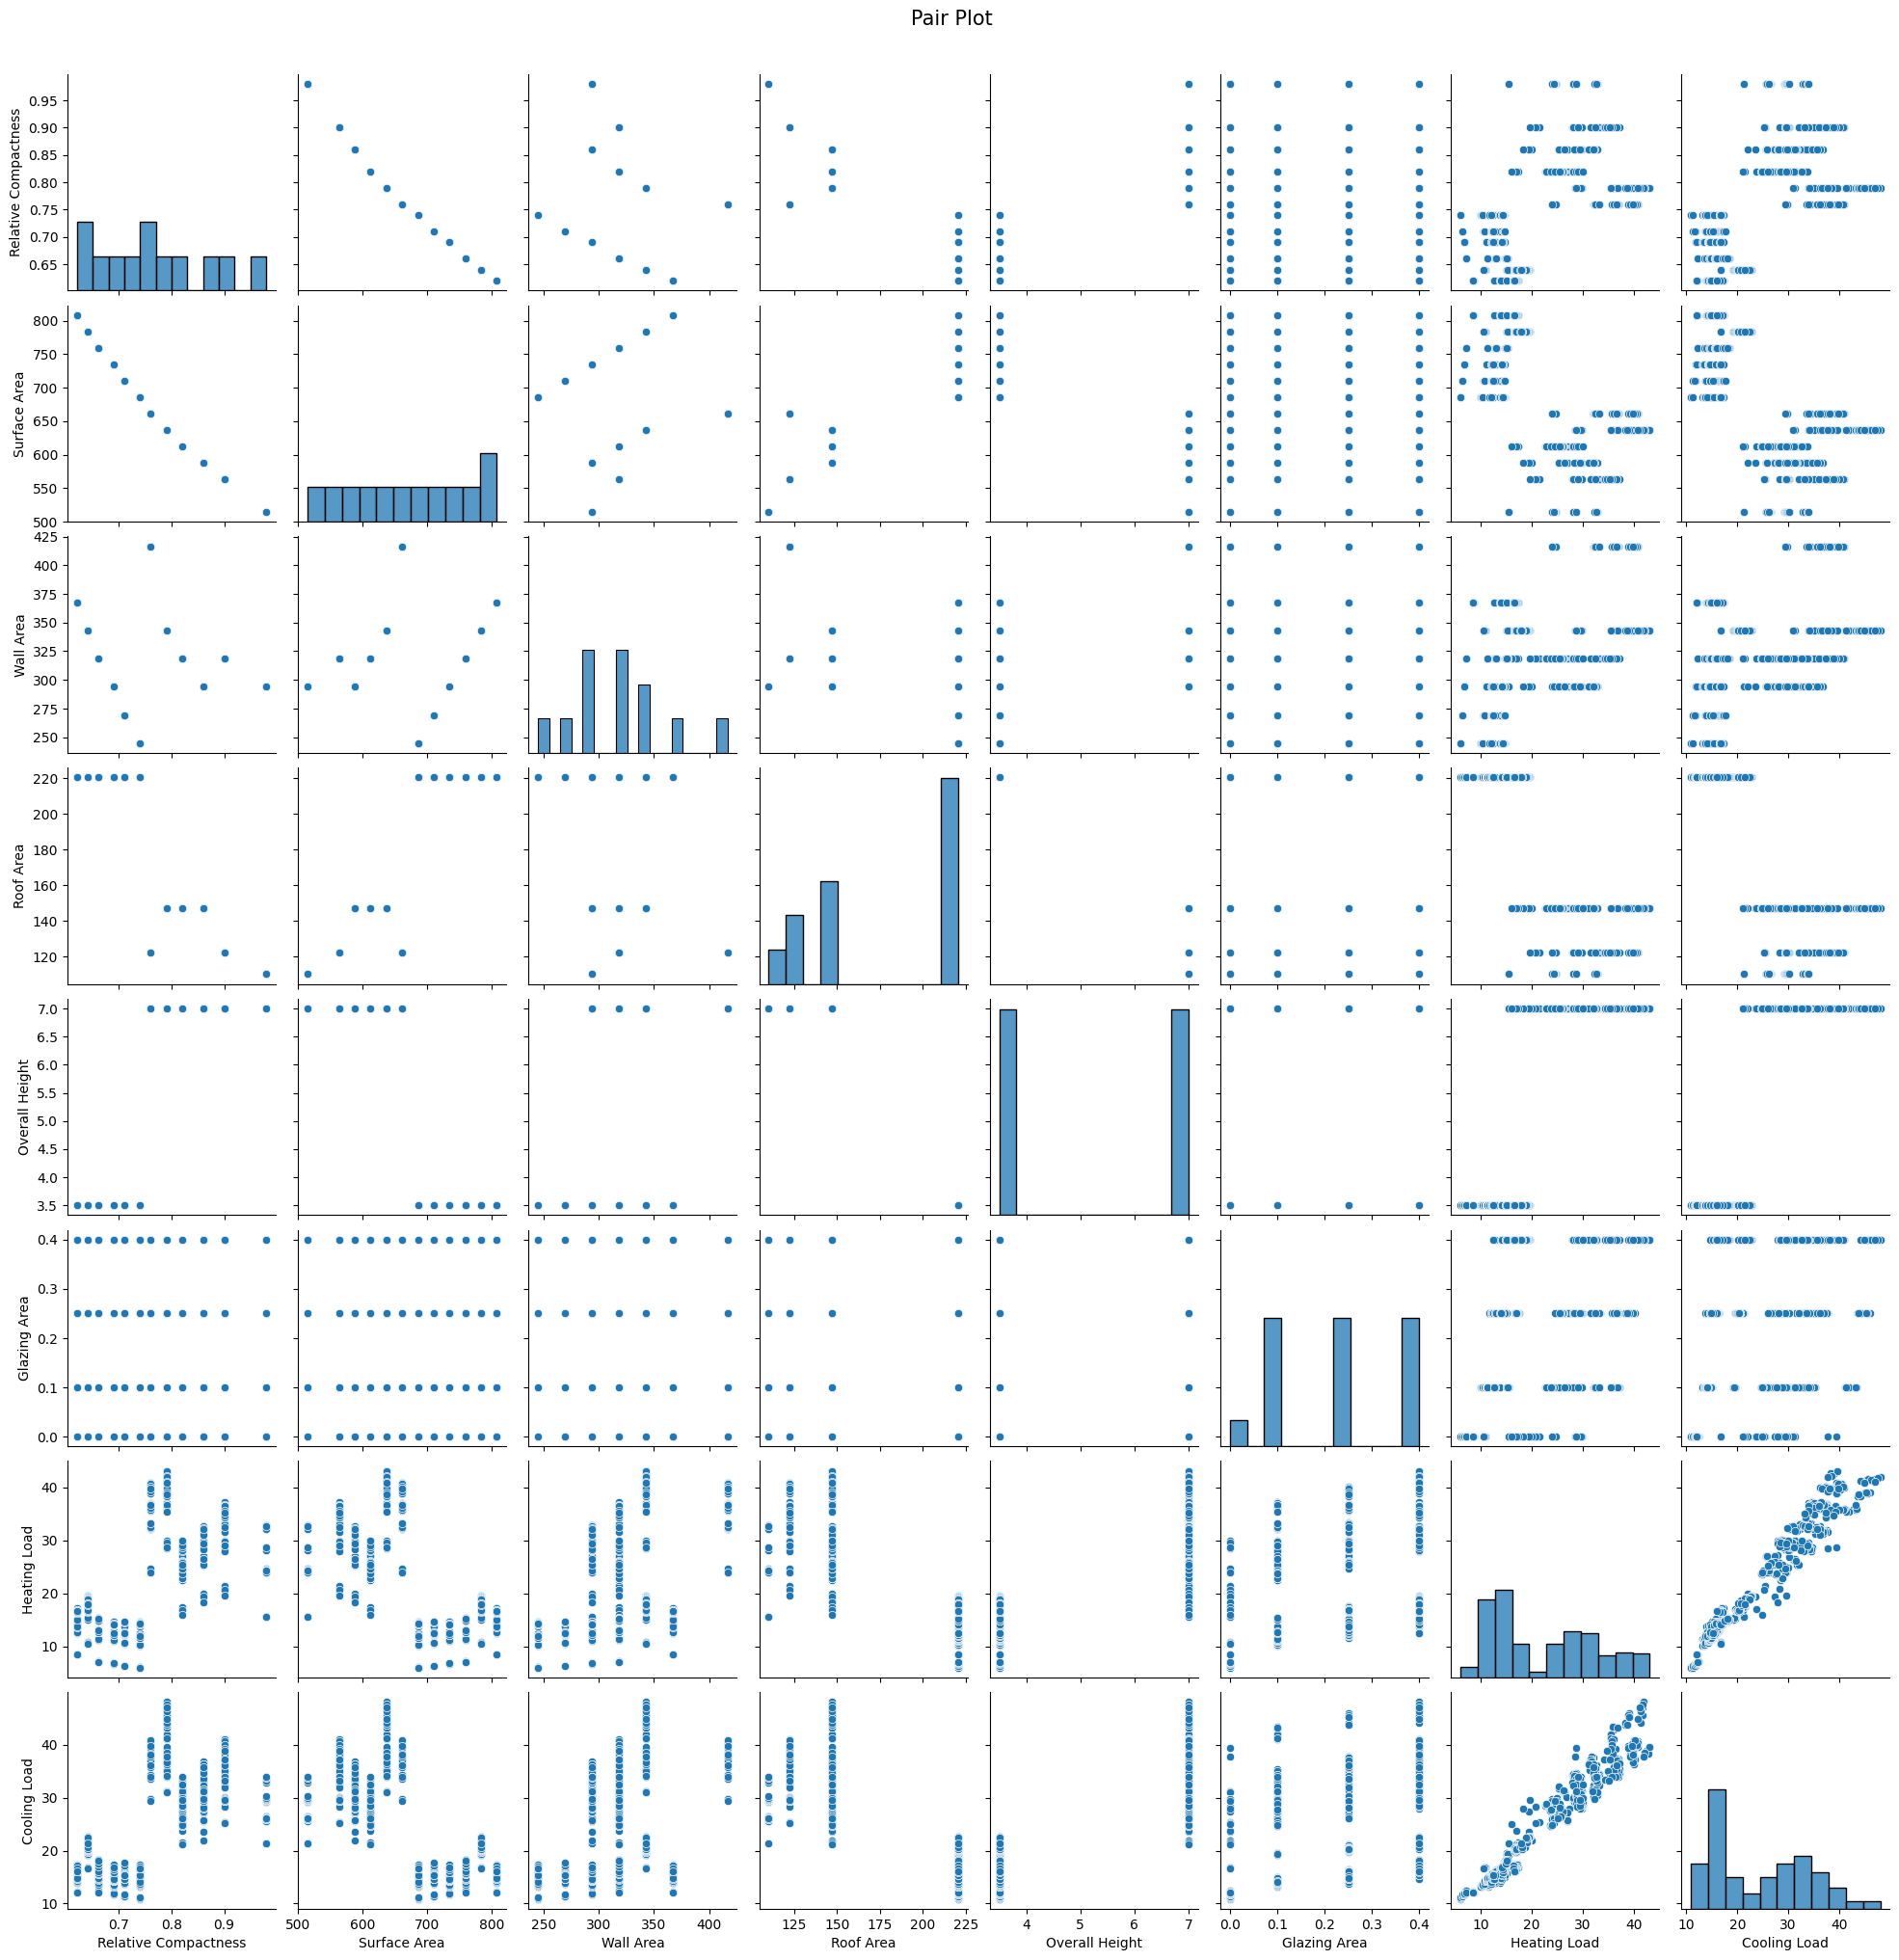

In [6]:
sb.pairplot(df, height=2.5, aspect=1)
plt.suptitle('Pair Plot', y=1.02, size=15)
plt.show()

The pair plot indicates that there are non-linear relationships between features and the targets. This suggests that linear models might not fully capture the complexities in the data. The targets, Heating Load and Cooling Load, show a positive linear relationship with each other.

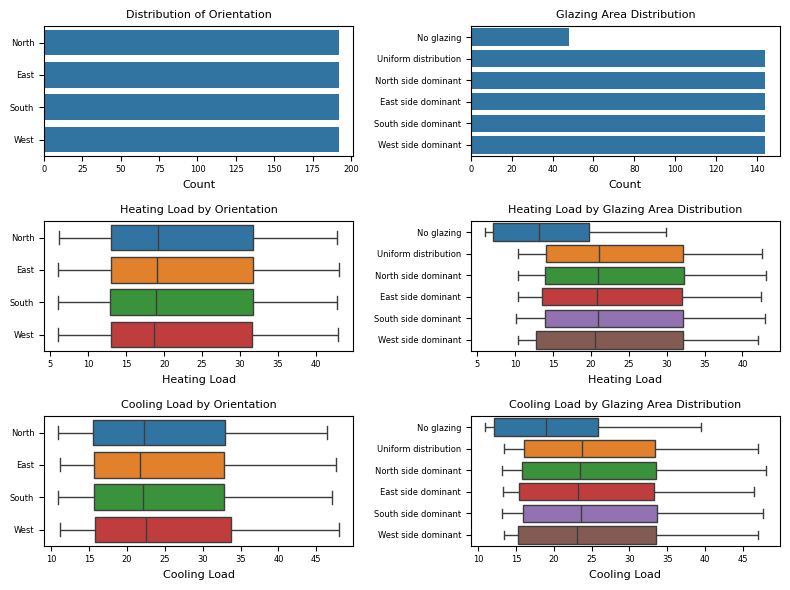

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(8, 6), layout='tight')
# Bar plot for categorical columns
sb.countplot(df, y='Orientation', ax=axs[0,0])
axs[0,0].set_title(f'Distribution of Orientation', size=8)
axs[0,0].set_ylabel(None)
axs[0,0].set_xlabel('Count', size=8)
axs[0,0].tick_params(axis='y', labelsize=6)
axs[0,0].tick_params(axis='x', labelsize=6)

sb.countplot(df, y='Glazing Area Distribution', ax=axs[0,1])
axs[0,1].set_title(f'Glazing Area Distribution', size=8)
axs[0,1].set_ylabel(None)
axs[0,1].set_xlabel('Count', size=8)
axs[0,1].tick_params(axis='y', labelsize=6)
axs[0,1].tick_params(axis='x', labelsize=6)

# Box plot for categorical columns based on targets
sb.boxplot(df, x='Heating Load', y='Orientation', hue='Orientation', ax=axs[1,0])
axs[1,0].set_title(f'Heating Load by Orientation', size=8)
axs[1,0].set_ylabel(None)
axs[1,0].set_xlabel('Heating Load', size=8)
axs[1,0].tick_params(axis='y', labelsize=6)
axs[1,0].tick_params(axis='x', labelsize=6)

sb.boxplot(df, x='Heating Load', y='Glazing Area Distribution', hue='Glazing Area Distribution', ax=axs[1,1])
axs[1,1].set_title(f'Heating Load by Glazing Area Distribution', size=8)
axs[1,1].set_ylabel(None)
axs[1,1].set_xlabel('Heating Load', size=8)
axs[1,1].tick_params(axis='y', labelsize=6)
axs[1,1].tick_params(axis='x', labelsize=6)

sb.boxplot(df, x='Cooling Load', y='Orientation', hue='Orientation', ax=axs[2,0])
axs[2,0].set_title(f'Cooling Load by Orientation', size=8)
axs[2,0].set_ylabel(None)
axs[2,0].set_xlabel('Cooling Load', size=8)
axs[2,0].tick_params(axis='y', labelsize=6)
axs[2,0].tick_params(axis='x', labelsize=6)

sb.boxplot(df, x='Cooling Load', y='Glazing Area Distribution', hue='Glazing Area Distribution', ax=axs[2,1])
axs[2,1].set_title(f'Cooling Load by Glazing Area Distribution', size=8)
axs[2,1].set_ylabel(None)
axs[2,1].set_xlabel('Cooling Load', size=8)
axs[2,1].tick_params(axis='y', labelsize=6)
axs[2,1].tick_params(axis='x', labelsize=6)

plt.show()

From above plots, Orientation and Glazing Area Distribution categories are relatively balanced, except for the "No glazing" category in Glazing Area Distribution, which has fewer samples compared to the others.  

The medians of the Heating and Cooling Loads across different Orientation categories are almost identical. This suggests that Orientation likely does not have a significant impact on predicting Heating and Cooling Loads.  

Most categories within Glazing Area Distribution also show similar medians for Heating and Cooling Loads, with the exception of the "No glazing" category, which has a smaller median than the others. This suggests that while Glazing Area Distribution might not significantly impact the prediction of Heating and Cooling Loads, the presence or absence of glazing (No glazing vs. any glazing) could be a more relevant factor.  

Given the minimal impact of specific categories within Glazing Area Distribution, it may be beneficial to simplify this variable. Instead of six categories, you could consider collapsing them into two broader categories: "No glazing" and "Glazing." This simplification could reduce noise and make the model more interpretable without losing significant predictive power.


In [8]:
df['Glazing Area Distribution'] = df['Glazing Area Distribution'].replace({
    'No glazing':'No Glazing', 'Uniform distribution':'Glazing', 
    'North side dominant':'Glazing', 'East side dominant':'Glazing', 
    'South side dominant':'Glazing', 'West side dominant':'Glazing'
})

#### Data Splitting
We will split the dataset into training and testing sets with 70% allocated for training the model and 30% for testing. Since we have two target variables Heating Load and Cooling Load, we need to ensure that the data is split consistently for both targets.

In [9]:
X = df.drop(columns=['Heating Load', 'Cooling Load'])
y1 = df['Heating Load']
y2 = df['Cooling Load']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y1, test_size=0.3, random_state=11)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y2, test_size=0.3, random_state=11)
print('=='*15)
print(f'Heating Load\ntrain set:\t{X_train_1.shape}, {y_train_1.shape}\ntest set:\t{X_test_1.shape}, {y_test_1.shape}')
print(f'\nCooling Load\ntrain set:\t{X_train_2.shape}, {y_train_2.shape}\ntest set:\t{X_test_2.shape}, {y_test_2.shape}')
print('=='*15)

Heating Load
train set:	(537, 8), (537,)
test set:	(231, 8), (231,)

Cooling Load
train set:	(537, 8), (537,)
test set:	(231, 8), (231,)


## Data Preprocessing
In this section, we will use StandardScaler to standardize the numeric columns. This ensures that all numeric features have a mean of 0 and a standard deviation of 1, which helps improve model performance. OneHotEncode will be used to encode the categorical columns, which converts categorical variables into numeric format.

In [10]:
# List numeric and categorical columns
numeric_cols = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area','Overall Height', 'Glazing Area']
categorical_cols = ['Orientation', 'Glazing Area Distribution']

# Pipeline to transform and encode the columns
numeric_pipe = make_pipeline(StandardScaler())
categorical_pipe = make_pipeline(OneHotEncoder(dtype=int, handle_unknown='ignore', drop='if_binary'))

# ColumnTransformer to apply the transformers on the columns.
col_transform = make_column_transformer((numeric_pipe, numeric_cols), 
                                        (categorical_pipe, categorical_cols),
                                        remainder='passthrough')

## Model Building
To identify the most effective model for predicting Heating and Cooling Loads, we will train and evaluate a variety of machine learning models using the training set. The goal is to determine which model performs best based on its ability to accurately predict the targets.

Given that the features have non-linear relationships with the targets (Heating and Cooling Loads), linear models may not be the most suitable choice. Therefore, we will focus on models capable of capturing these non-linear relationships.

In [11]:
# R2 Adjusted
def r2_adj(r2, y):
    '''
    Finds the R2 Adjusted score for regression model.

    parameters
    ----------
    r2: float coefficient determination
    y: pandas series
    Return
    ------
    r2_adjust: float 
    returns adjusted coefficient determination
    '''
    r2_adjust = 1-(((1-r2)*(len(y)-1))/(len(y)-X.shape[1]-1))
    return r2_adjust
    
# Checking linear regressions first
def metrics_scores(model, x, y, target_name):
    """
    Evaluates and prints performance metrics for a given regression model.

    This function fits a provided model to the data, makes predictions, and calculates performance metrics including 
    R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). It also prints 
    these metrics along with the target name.

    Parameters:
    model (sklearn estimator): The regression model to evaluate.
    x (array-like or pd.DataFrame): The feature matrix used for fitting the model.
    y (array-like or pd.Series): The true target values used for evaluating the model.
    target_name (str): The name of the target variable being predicted. This is used for printing purposes.

    Returns:
    None: The function prints the metrics directly.

    Example:
    >>> from sklearn.linear_model import LinearRegression
    >>> model = LinearRegression()
    >>> metrics_scores(model, X_train, y_train, 'Heating Load')
    """
    pipe = make_pipeline(col_transform, model)
    pipe.fit(x, y)
    y_pred = pipe.predict(x)
    R2 = r2_score(y, y_pred)
    R2_adjusted = r2_adj(R2, y)
    MSE = mean_squared_error(y, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y, y_pred)
    print(target_name)
    print('=='*15)
    print(f'R2\t{R2}\nR2 Adj\t{R2_adjusted}\nMSE\t{MSE}\nRMSE\t{RMSE}\nMAE\t{MAE}')
    print('=='*15,'\n')

metrics_scores(LinearRegression(), X_train_1, y_train_1, 'Heating Load Target')
metrics_scores(LinearRegression(), X_train_2, y_train_2, 'Cooling Load Target')

Heating Load Target
R2	0.925845751881796
R2 Adj	0.9247222026678837
MSE	7.566227208495639
RMSE	2.7506775907938827
MAE	1.9786911952979516

Cooling Load Target
R2	0.889097310027314
R2 Adj	0.887416966239849
MSE	10.050339114502066
RMSE	3.1702269815428146
MAE	2.265999403514898



Linear Regression model for predicting both Heating and Cooling Loads demonstrates strong performance, with high R2, R2 adjusted and relatively low MSE, RMSE, and MAE values. This indicates that the model is effective at capturing the variance in Heating Load and provides accurate predictions, but the non-linearity suggests that exploring non-linear models might improve predictive accuracy further.

In [12]:
# Training linear and non-linear regression models
models = {'Linear Regression':LinearRegression(), 
          'Ridge':Ridge(), 'Lasso':Lasso(),
          'Decision Tree':DecisionTreeRegressor(), 
          'Random Forest':RandomForestRegressor(),
          'Gradient Bossting':GradientBoostingRegressor(), 
          'Hist Gradient Boosting':HistGradientBoostingRegressor(),
          'KNeighbors':KNeighborsRegressor(), 'SVR':SVR()}

result_heat = {'model':[], 'mean cv score':[], 'mean train score':[]}
result_cool = {'model':[], 'mean cv score':[], 'mean train score':[]}
for name, lm in models.items():
    pipe_h = make_pipeline(col_transform, lm)
    cv_h = cross_validate(pipe_h, X_train_1, y_train_1, cv=KFold(n_splits=10, shuffle=True, random_state=10), return_train_score=True)
    result_heat['model'].append(name)
    result_heat['mean cv score'].append(cv_h['test_score'].mean())
    result_heat['mean train score'].append(cv_h['train_score'].mean())
    
    pipe_c = make_pipeline(col_transform, lm)
    cv_c = cross_validate(pipe_c, X_train_2, y_train_2, cv=KFold(n_splits=10, shuffle=True, random_state=10), return_train_score=True)
    result_cool['model'].append(name)
    result_cool['mean cv score'].append(cv_c['test_score'].mean())
    result_cool['mean train score'].append(cv_c['train_score'].mean())

df_heat = pd.DataFrame(result_heat).sort_values(by='mean train score', ascending=False)
df_cool = pd.DataFrame(result_cool).sort_values(by='mean train score', ascending=False)

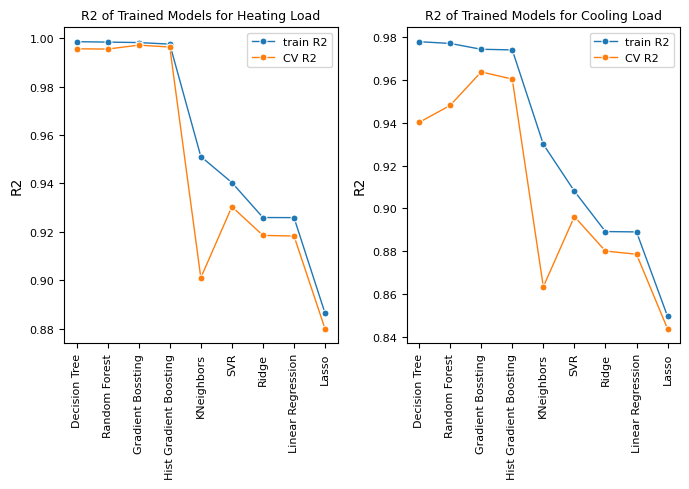

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(7, 5), layout='tight')
# Heating Load
sb.lineplot(df_heat, x='model', y='mean train score', marker='o', ms=5, lw=1, ax=axs[0], label='train R2')
sb.lineplot(df_heat, x='model', y='mean cv score', marker='o', ms=5, lw=1, ax=axs[0], label='CV R2')
axs[0].set_title('R2 of Trained Models for Heating Load', size=9)
axs[0].set_xlabel(None)
axs[0].set_ylabel('R2')
axs[0].tick_params(axis='x', rotation=90, labelsize=8)
axs[0].tick_params(axis='y', labelsize=8)
axs[0].legend(fontsize=8)

# Cooling Load
sb.lineplot(df_cool, x='model', y='mean train score', marker='o', ms=5, lw=1, ax=axs[1], label='train R2')
sb.lineplot(df_cool, x='model', y='mean cv score', marker='o', ms=5, lw=1, ax=axs[1], label='CV R2')
axs[1].set_title('R2 of Trained Models for Cooling Load', size=9)
axs[1].set_xlabel(None)
axs[1].set_ylabel('R2')
axs[1].tick_params(axis='x', rotation=90, labelsize=8)
axs[1].tick_params(axis='y', labelsize=8)
axs[1].legend(fontsize=8)
plt.show()

The line charts indicate that non-linear regression models outperform linear regression models, such as Linear Regression, Ridge, and Lasso, in terms of R2 scores. Among the non-linear models, Gradient Boosting Regression and Hist Gradient Boosting Regression emerge as the top performers for predicting both Heating and Cooling Loads.  

However, Gradient Boosting Regression appears to be the more reliable choice between the two. It consistently achieved higher cross-validation R2 scores for both targets. In contrast, Hist Gradient Boosting Regression showed slightly lower cross-validation R2 score, particularly in predicting Cooling Load.

In [14]:
# Metrics for linear and non-linear regression models
models = {'Linear Regression':LinearRegression(), 
          'Ridge':Ridge(), 'Lasso':Lasso(),
          'Decision Tree':DecisionTreeRegressor(), 
          'Random Forest':RandomForestRegressor(),
          'Gradient Bossting':GradientBoostingRegressor(), 
          'Hist Gradient Boosting':HistGradientBoostingRegressor(),
          'KNeighbors':KNeighborsRegressor(), 'SVR':SVR()}

result_heat = {'model':[], 'MSE':[], 'RMSE':[], 'MAE':[]}
result_cool = {'model':[], 'MSE':[], 'RMSE':[], 'MAE':[]}
for name, lm in models.items():
    # Heating Load target
    pipe_h = make_pipeline(col_transform, lm)
    pipe_h.fit(X_train_1, y_train_1)
    y_pred_1 = pipe_h.predict(X_train_1)
    mse = mean_squared_error(y_train_1, y_pred_1)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_train_1, y_pred_1)
    result_heat['model'].append(name)
    result_heat['MSE'].append(mse)
    result_heat['RMSE'].append(rmse)
    result_heat['MAE'].append(mae)

    # Cooling Load target
    pipe_c = make_pipeline(col_transform, lm)
    pipe_c.fit(X_train_2, y_train_2)
    y_pred_2 = pipe_c.predict(X_train_2)
    mse = mean_squared_error(y_train_2, y_pred_2)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_train_2, y_pred_2)
    result_cool['model'].append(name)
    result_cool['MSE'].append(mse)
    result_cool['RMSE'].append(rmse)
    result_cool['MAE'].append(mae)

df_heat = pd.DataFrame(result_heat).sort_values(by='MSE')
df_cool = pd.DataFrame(result_cool).sort_values(by='MSE')

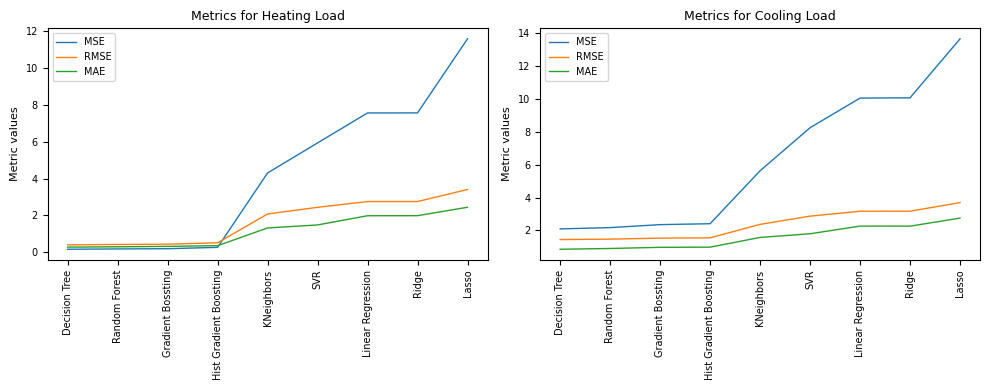

In [15]:
# Making line plot for metrics
fig, axs = plt.subplots(1, 2, figsize=(10, 4), layout='tight')
sb.lineplot(df_heat, x='model', y='MSE', lw=1, label='MSE', ax=axs[0])
sb.lineplot(df_heat, x='model', y='RMSE', lw=1, label='RMSE', ax=axs[0])
sb.lineplot(df_heat, x='model', y='MAE', lw=1, label='MAE', ax=axs[0])
axs[0].set_title('Metrics for Heating Load', size=9)
axs[0].set_xlabel(None)
axs[0].set_ylabel('Metric values', size=8)
axs[0].tick_params(axis='x', rotation=90, labelsize=7)
axs[0].tick_params(axis='y', labelsize=7)
axs[0].legend(fontsize=7)

sb.lineplot(df_cool, x='model', y='MSE', lw=1, label='MSE', ax=axs[1])
sb.lineplot(df_cool, x='model', y='RMSE', lw=1, label='RMSE', ax=axs[1])
sb.lineplot(df_cool, x='model', y='MAE', lw=1, label='MAE', ax=axs[1])
axs[1].set_title('Metrics for Cooling Load', size=9)
axs[1].set_xlabel(None)
axs[1].set_ylabel('Metric values', size=8)
axs[1].tick_params(axis='x', rotation=90, labelsize=7)
axs[1].tick_params(axis='y', labelsize=7)
axs[1].legend(fontsize=7)
plt.show()

The metric line plots highlight that non-linear models like Decision Tree, Random Forest, Gradient Boosting, and Hist Gradient Boosting regressions outperform linear models when predicting both Heating and Cooling Loads. These non-linear models exhibit lower error metrics such as MSE, RMSE, and MAE, indicating better predictive accuracy. In contrast, linear regression models demonstrate higher MSE, RMSE, and MAE values, suggesting that they are less effective in capturing the complexity of the relationships between features and targets in this dataset.

## Model Selection and Evaluation
We have selected four non-linear regression models (DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, and HistGradientBoostingRegressor) based on their strong performance on the training set, where they demonstrated low mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE). These models will now be evaluated on the test set to assess their generalization capabilities. Finally, we will choose the best-performing model for predicting each target, Heating Load and Cooling Load, based on their performance on the test set.

In [16]:
# Selected models
models = {'Decision Tree':DecisionTreeRegressor(), 
          'Random Forest':RandomForestRegressor(),
          'Gradient Bossting':GradientBoostingRegressor(), 
          'Hist Gradient Boosting':HistGradientBoostingRegressor()}

In [17]:
result_h = {'model':[], 'R2':[], 'R2_adjust':[], 'MSE':[], 'RMSE':[], 'MAE':[]}
result_c = {'model':[], 'R2':[], 'R2_adjust':[], 'MSE':[], 'RMSE':[], 'MAE':[]}
for name, model in models.items():
    # Heating load target
    pipe_h = make_pipeline(col_transform, model)
    pipe_h.fit(X_train_1, y_train_1)
    y_pred_h = pipe_h.predict(X_test_1)
    r2 = r2_score(y_test_1, y_pred_h)
    r2_adjust = r2_adj(r2, y_test_1)
    mse = mean_squared_error(y_test_1, y_pred_h)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_1, y_pred_h)
    result_h['model'].append(name)
    result_h['R2'].append(r2)
    result_h['R2_adjust'].append(r2_adjust)
    result_h['MSE'].append(mse)
    result_h['RMSE'].append(rmse)
    result_h['MAE'].append(mae)
    
    # Cooling load target
    pipe_c = make_pipeline(col_transform, model)
    pipe_c.fit(X_train_2, y_train_2)
    y_pred_c = pipe_c.predict(X_test_2)
    r2 = r2_score(y_test_2, y_pred_c)
    r2_adjust = r2_adj(r2, y_test_2)
    mse = mean_squared_error(y_test_2, y_pred_c)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_2, y_pred_c)
    result_c['model'].append(name)
    result_c['R2'].append(r2)
    result_c['R2_adjust'].append(r2_adjust)
    result_c['MSE'].append(mse)
    result_c['RMSE'].append(rmse)
    result_c['MAE'].append(mae)

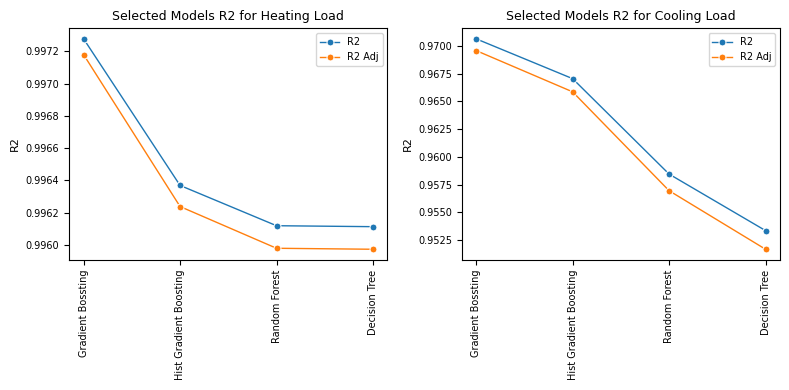

In [18]:
df_h = pd.DataFrame(result_h).sort_values(by='R2', ascending=False)
df_c = pd.DataFrame(result_c).sort_values(by='R2', ascending=False)
fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='tight')

sb.lineplot(df_h, x='model', y='R2', marker='o', ms=5, lw=1, ax=axs[0], label='R2')
sb.lineplot(df_h, x='model', y='R2_adjust', marker='o', ms=5, lw=1, ax=axs[0], label='R2 Adj')
axs[0].set_title('Selected Models R2 for Heating Load', size=9)
axs[0].set_xlabel(None)
axs[0].set_ylabel('R2', size=8)
axs[0].tick_params(axis='x', rotation=90, labelsize=7)
axs[0].tick_params(axis='y', labelsize=7)
axs[0].legend(fontsize=7)

sb.lineplot(df_c, x='model', y='R2', marker='o', ms=5, lw=1, ax=axs[1], label='R2')
sb.lineplot(df_c, x='model', y='R2_adjust', marker='o', ms=5, lw=1, ax=axs[1], label='R2 Adj')
axs[1].set_title('Selected Models R2 for Cooling Load', size=9)
axs[1].set_xlabel(None)
axs[1].set_ylabel('R2', size=8)
axs[1].tick_params(axis='x', rotation=90, labelsize=7)
axs[1].tick_params(axis='y', labelsize=7)
axs[1].legend(fontsize=7)
plt.show()

From the line charts, we can see that among the non-linear regression models, Gradient Boosting Regression stands out as the best model for predicting both Heating and Cooling Loads. This conclusion is based on its higher R2 and R2 adjusted scores compared to the other models, indicating that it explains the most variance in the data and is the most accurate at capturing the relationship between building characteristics and energy loads.

In [19]:
model = GradientBoostingRegressor()
# Heating Load target
pipe_h = make_pipeline(col_transform, model)
pipe_h.fit(X_train_1, y_train_1)
y_pred_h = pipe_h.predict(X_test_1)
r2 = r2_score(y_test_1, y_pred_h)
r2_ad = r2_adj(r2, y_test_1)
mse = mean_squared_error(y_test_1, y_pred_h)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_1, y_pred_h)
print('Heating Load Tagret')
print('=='*15)
print(f'R2\t{r2:.3f}\nR2 Adj\t{r2_ad:.3f}\nMSE\t{mse:.3f}\nRMSE\t{rmse:.3f}\nMAE\t{mae:.3f}')
print('=='*15,'\n')
    
# Cooling Load target
pipe_c = make_pipeline(col_transform, model)
pipe_c.fit(X_train_2, y_train_2)
y_pred_c = pipe_c.predict(X_test_2)
r2 = r2_score(y_test_2, y_pred_c)
r2_ad = r2_adj(r2, y_test_2)
mse = mean_squared_error(y_test_2, y_pred_c)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_2, y_pred_c)
print('Cooling Load Tagret')
print('=='*15)
print(f'R2\t{r2:.3f}\nR2 Adj\t{r2_ad:.3f}\nMSE\t{mse:.3f}\nRMSE\t{rmse:.3f}\nMAE\t{mae:.3f}')
print('=='*15,'\n')

Heating Load Tagret
R2	0.997
R2 Adj	0.997
MSE	0.274
RMSE	0.524
MAE	0.358

Cooling Load Tagret
R2	0.971
R2 Adj	0.970
MSE	2.634
RMSE	1.623
MAE	1.061



GradientBoostingRegressor performs exceptionally well, with heating load predictions being particularly accurate. The cooling load predictions are also very strong, making this model an excellent choice for both targets. The model achieves the highest R2 and adjusted R2 scores, confirming its suitability for predicting energy loads in buildings.  

- `R2:` The model explains 99.7% of the variance in the heating load and 97.1% of variance in cooling load, indicating a very strong performance.
- `Adjusted R2:` After accounting for model complexity, the variance explained remains high, further confirming the robustness of the model.
- `MSE:` The mean squared errors (0.274, 2.64) are quite low, which indicates that the model's predictions are very close to actual values.
- `RMSE:` The small root mean squared errors (0.52, 1.62) reflect high accuracy in predictions.
- `MAE:` The average absolute error (0.36, 1.06) are minimal, further confirming precise predictions.

## Feature Importances
Next, we will extract the feature importance from the model to see which features have the most influence on the energy efficiency.

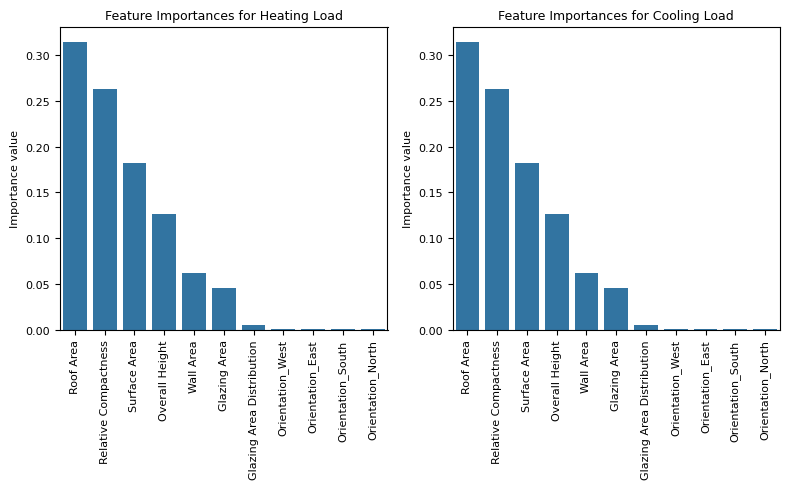

In [20]:
numeric = numeric_cols
categorical = pipe_h.named_steps['columntransformer'].named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names_out().tolist()
categorical[-1] = 'Glazing Area Distribution'
columns = numeric + categorical
importance_heat = pipe_h.named_steps['gradientboostingregressor'].feature_importances_
importance_cool = pipe_c.named_steps['gradientboostingregressor'].feature_importances_

df_imp = pd.DataFrame({'heat_imp':importance_heat, 'cool_imp':importance_cool, 'features':columns}).sort_values(by='heat_imp', ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(8, 5), layout='tight')
sb.barplot(df_imp, x='features', y='heat_imp', ax=axs[0])
axs[0].set_title('Feature Importances for Heating Load', size=9)
axs[0].set_xlabel(None)
axs[0].set_ylabel('Importance value', size=8)
axs[0].tick_params(axis='x', rotation=90, labelsize=8)
axs[0].tick_params(axis='y', labelsize=8)

# Feature importances for cooling target
sb.barplot(df_imp, x='features', y='cool_imp', ax=axs[1])
axs[1].set_title('Feature Importances for Cooling Load', size=9)
axs[1].set_xlabel(None)
axs[1].set_ylabel('Importance value', size=8)
axs[1].tick_params(axis='x', rotation=90, labelsize=8)
axs[1].tick_params(axis='y', labelsize=8)

plt.show()

The feature importance analysis shows that Roof Area is the most influential factor in predicting heating and cooling loads, indicating its strong impact on the model's performance. Other significant contributors include Surface Area, Overall Height, and Relative Compactness, which play notable roles in determining energy efficiency. In contrast, Wall Area, Glazing Area, and Glazing Area Distribution have relatively minor influence, while Orientation proves to be nearly irrelevant, contributing very little to the model’s predictive power.<br>  

Notice that feature importances are similar for both heating load and cooling load. It is because Heating and cooling loads are highly correlated, as they are both driven by similar building characteristics, such as surface area, roof area, and overall height. Since both targets depend on these common features, it's not surprising that their importance rankings are similar.

## Discussion
In this project, we aimed to develop predictive models for estimating heating and cooling loads in buildings based on various characteristics. Our approach included evaluating both linear and non-linear regression models to determine which type of model offers the best performance for this task.<br>  

The analysis revealed that non-linear regression models, particularly Gradient Boosting Regression, outperformed linear models significantly. The Gradient Boosting Regressor achieved impressive results with high R2 and Adjusted R2 scores for both heating and cooling loads, indicating that it effectively captures the complex relationships between features and targets. Specifically, it demonstrated an R2 of 0.997 for heating load and 0.971 for cooling load, alongside low values for MSE, RMSE, and MAE, suggesting precise and reliable predictions.<br>  

Feature importance analysis showed that Roof Area is the most critical feature in predicting both heating and cooling loads. This is followed by Surface Area, Overall Height, and Relative Compactness, which also contribute significantly to the model. Conversely, features like Wall Area, Glazing Area, and Glazing Area Distribution have less impact, while Orientation has almost negligible influence on predictions.<br>  

The findings highlight that certain building characteristics, particularly those related to the overall size and shape of the building (e.g., Roof Area and Surface Area), are more critical for predicting energy loads than others. This suggests that efforts to improve building energy efficiency should prioritize optimizing these key features. Additionally, the limited influence of features like Orientation suggests that while it may be a factor in some contexts, its impact on heating and cooling loads in this dataset is minimal.<br>  


In conclusion, non-linear models, especially Gradient Boosting Regression, provide a robust approach for predicting building energy loads, capturing complex patterns more effectively than linear models. The feature importance analysis underscores the significance of specific building characteristics in influencing energy consumption, offering valuable guidance for architects, engineers, and policymakers in designing more energy-efficient buildings.